In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install --upgrade mySUNI -q
from mySUNI import cds
cds.download_data('사용자이탈예측')

파일 다운로드 완료

데이터셋: 사용자이탈예측
파일경로: data\class.csv

파일 다운로드 완료

데이터셋: 사용자이탈예측
파일경로: data\event.csv

파일 다운로드 완료

데이터셋: 사용자이탈예측
파일경로: data\logs.csv

파일 다운로드 완료

데이터셋: 사용자이탈예측
파일경로: data\user_info.csv



In [5]:
# 코드를 입력해 주세요
# logs.csv 파일을 읽으세요.
df_logs = pd.read_csv('data/logs.csv')
df_logs

log    userid        date
0       L00000049012330  AS009373  2018-04-01
1       L00000049012331  AS015315  2018-04-01
2       L00000049012332  AS040841  2018-04-01
3       L00000049012333  AS046594  2018-04-01
4       L00000049012334  AS073285  2018-04-01
...                 ...       ...         ...
197423  L00000049209753  TS977703  2019-03-31
197424  L00000049209754  TS979550  2019-03-31
197425  L00000049209755  TS995299  2019-03-31
197426  L00000049209756  TS995853  2019-03-31
197427  L00000049209757  TS999079  2019-03-31

[197428 rows x 3 columns]

In [6]:
# 코드를 입력해 주세요
# user_info.csv 파일을 읽으세요.
df_user_info = pd.read_csv('data/user_info.csv')
df_user_info

userid class gender       start_date end_date event_type  is_deleted
0     OA832399   C01      F  2015-05-01 0:00      NaN        CA1           0
1     PL270116   C01      M  2015-05-01 0:00      NaN        CA1           0
2     OA974876   C01      M  2015-05-01 0:00      NaN        CA1           0
3     HD024127   C01      F  2015-05-01 0:00      NaN        CA1          -1
4     HD661448   C03      F  2015-05-01 0:00      NaN        CA1          -1
...        ...   ...    ...              ...      ...        ...         ...
4187  HD676663   C01      M  2019-03-14 0:00      NaN        CA1           0
4188  HD246549   C01      F  2019-03-14 0:00      NaN        CA1           0
4189  GD037007   C03      M  2019-03-14 0:00      NaN        CA1           0
4190  OA953150   C01      M  2019-03-14 0:00      NaN        CA1          -1
4191  IK692635   C02      F  2019-03-15 0:00      NaN        CA1           0

[4192 rows x 7 columns]

In [7]:
# 코드를 입력해 주세요
# class.csv 파일을 읽으세요.
df_class = pd.read_csv('data/class.csv')
df_class

class class_name  price
0   C01        all  10000
1   C02        day   7000
2   C03      night   5000

In [8]:
# 코드를 입력해 주세요
# event.csv 파일을 읽으세요.
df_event = pd.read_csv('data/event.csv')
df_event

event_type\tevent_name
0              CA1\tNone
1              CA2\tSale
2              CA3\tFree

In [9]:
# 코드를 입력해 주세요
# event.csv 파일을 다시 읽으세요.
# 구분자는 \t 입니다.
df_event = pd.read_csv('data/event.csv', sep='\t')
df_event

event_type event_name
0        CA1       None
1        CA2       Sale
2        CA3       Free

In [10]:
# 코드를 입력해 주세요
# 파편화된 데이터를 병합 합니다.
# 1. df_user_info와 df_class을 class를 기준으로 병합하세요. 
user = pd.merge(df_user_info, df_class, on='class')
user

userid class gender       start_date end_date event_type  is_deleted  \
0     OA832399   C01      F  2015-05-01 0:00      NaN        CA1           0   
1     PL270116   C01      M  2015-05-01 0:00      NaN        CA1           0   
2     OA974876   C01      M  2015-05-01 0:00      NaN        CA1           0   
3     HD024127   C01      F  2015-05-01 0:00      NaN        CA1          -1   
4     IK271057   C01      M  2015-05-01 0:00      NaN        CA1           0   
...        ...   ...    ...              ...      ...        ...         ...   
4187  IK947853   C02      F  2019-03-09 0:00      NaN        CA1           0   
4188  OA301090   C02      F  2019-03-12 0:00      NaN        CA1           0   
4189  OA643695   C02      F  2019-03-12 0:00      NaN        CA1           0   
4190  HD522396   C02      F  2019-03-13 0:00      NaN        CA1           0   
4191  IK692635   C02      F  2019-03-15 0:00      NaN        CA1           0   

     class_name  price  
0           all  10000  
1           all  10000  
2           all  10000  
3           all  10000  
4           all  10000  
...         ...    ...  
4187        day   7000  
4188        day   7000  
4189        day   7000  
4190        day   7000  
4191        day   7000  

[4192 rows x 9 columns]

In [11]:
# 코드를 입력해 주세요
# 2. user와 df_event를 event_type을 기준으로 병합하세요.
user = pd.merge(user, df_event, on='event_type')
user

userid class gender       start_date         end_date event_type  \
0     OA832399   C01      F  2015-05-01 0:00              NaN        CA1   
1     PL270116   C01      M  2015-05-01 0:00              NaN        CA1   
2     OA974876   C01      M  2015-05-01 0:00              NaN        CA1   
3     HD024127   C01      F  2015-05-01 0:00              NaN        CA1   
4     IK271057   C01      M  2015-05-01 0:00              NaN        CA1   
...        ...   ...    ...              ...              ...        ...   
4187  IK562610   C02      F  2018-12-13 0:00  2019-02-28 0:00        CA3   
4188  HI599354   C02      M  2018-12-13 0:00              NaN        CA3   
4189  GD796859   C02      F  2018-12-14 0:00              NaN        CA3   
4190  GD082270   C02      F  2018-12-14 0:00  2019-02-28 0:00        CA3   
4191  OA426023   C02      F  2018-12-14 0:00              NaN        CA3   

      is_deleted class_name  price event_name  
0              0        all  10000       None  
1              0        all  10000       None  
2              0        all  10000       None  
3             -1        all  10000       None  
4              0        all  10000       None  
...          ...        ...    ...        ...  
4187           1        day   7000       Free  
4188           0        day   7000       Free  
4189           0        day   7000       Free  
4190           1        day   7000       Free  
4191           0        day   7000       Free  

[4192 rows x 10 columns]

In [12]:
# 코드를 입력해 주세요
# user 데이터 프레임의 정보를 조회하세요
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userid      4192 non-null   object
 1   class       4192 non-null   object
 2   gender      4192 non-null   object
 3   start_date  4192 non-null   object
 4   end_date    1350 non-null   object
 5   event_type  4192 non-null   object
 6   is_deleted  4192 non-null   int64 
 7   class_name  4192 non-null   object
 8   price       4192 non-null   int64 
 9   event_name  4192 non-null   object
dtypes: int64(2), object(8)
memory usage: 360.2+ KB


In [13]:
# 코드를 입력해 주세요
# 결측치를 조회하세요.
user.isna().sum()

userid           0
class            0
gender           0
start_date       0
end_date      2842
event_type       0
is_deleted       0
class_name       0
price            0
event_name       0
dtype: int64

In [14]:
# 코드를 입력해 주세요
# end_date컬럼이 결측치인 데이터만 선택하여 출력하세요
user.loc[user['end_date'].isna(), :]

userid class gender       start_date end_date event_type  is_deleted  \
0     OA832399   C01      F  2015-05-01 0:00      NaN        CA1           0   
1     PL270116   C01      M  2015-05-01 0:00      NaN        CA1           0   
2     OA974876   C01      M  2015-05-01 0:00      NaN        CA1           0   
3     HD024127   C01      F  2015-05-01 0:00      NaN        CA1          -1   
4     IK271057   C01      M  2015-05-01 0:00      NaN        CA1           0   
...        ...   ...    ...              ...      ...        ...         ...   
4184  AS310166   C02      F  2018-12-12 0:00      NaN        CA3           0   
4186  HD071461   C02      F  2018-12-13 0:00      NaN        CA3           0   
4188  HI599354   C02      M  2018-12-13 0:00      NaN        CA3           0   
4189  GD796859   C02      F  2018-12-14 0:00      NaN        CA3           0   
4191  OA426023   C02      F  2018-12-14 0:00      NaN        CA3           0   

     class_name  price event_name  
0           all  10000       None  
1           all  10000       None  
2           all  10000       None  
3           all  10000       None  
4           all  10000       None  
...         ...    ...        ...  
4184        day   7000       Free  
4186        day   7000       Free  
4188        day   7000       Free  
4189        day   7000       Free  
4191        day   7000       Free  

[2842 rows x 10 columns]

In [15]:
# 코드를 입력해 주세요
# end_date컬럼이 결측치인 데이터의 is_deleted 컬럼의 값별 개수를 카운트 하세요.
user.loc[user['end_date'].isna(), 'is_deleted'].value_counts()

 0    2131
-1     711
Name: is_deleted, dtype: int64

In [16]:
# 코드를 입력해 주세요
# end_date컬럼이 결측치가 아닌 데이터의 is_deleted 컬럼의 값별 개수를 카운트 하세요.
user.loc[~user['end_date'].isna(), 'is_deleted'].value_counts()

 1    1013
-1     337
Name: is_deleted, dtype: int64

In [17]:
# 코드를 입력해 주세요
# class_name을 기준으로 그룹을 생성하고 userid의 개수를 조회하세요.
user.groupby('class_name')['userid'].count()

class_name
all      2045
day      1019
night    1128
Name: userid, dtype: int64

In [18]:
# 코드를 입력해 주세요
# event_name을 기준으로 그룹을 생성하고 userid의 개수를 조회하세요.
user.groupby('event_name')['userid'].count()

event_name
Free     492
None    3050
Sale     650
Name: userid, dtype: int64

In [19]:
# 코드를 입력해 주세요
# gender를 기준으로 그룹을 생성하고 userid의 개수를 조회하세요.
user.groupby('gender')['userid'].count()

gender
F    1983
M    2209
Name: userid, dtype: int64

In [20]:
# 코드를 입력해 주세요
# is_deleted를 기준으로 그룹을 생성하고 userid의 개수를 조회하세요.
user.groupby('is_deleted')['userid'].count()

is_deleted
-1    1048
 0    2131
 1    1013
Name: userid, dtype: int64

In [21]:
# 코드를 입력해 주세요
# start_date 컬럼과 end_date 컬럼을 datetime 형태로 변환하세요
user['start_date'] = pd.to_datetime(user['start_date'])
user['end_date'] = pd.to_datetime(user['end_date'])

In [22]:
# 코드를 입력해 주세요
# datetime으로 변경을 확인하기 위해 정보를 조회하세요
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   userid      4192 non-null   object        
 1   class       4192 non-null   object        
 2   gender      4192 non-null   object        
 3   start_date  4192 non-null   datetime64[ns]
 4   end_date    1350 non-null   datetime64[ns]
 5   event_type  4192 non-null   object        
 6   is_deleted  4192 non-null   int64         
 7   class_name  4192 non-null   object        
 8   price       4192 non-null   int64         
 9   event_name  4192 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 360.2+ KB


In [23]:
# 코드를 입력해 주세요
# start_date 컬럼을 기반으로 start_year, start_month, start_day 컬럼을 추가하세요
# dt 사용
user['start_year'] = user['start_date'].dt.year
user['start_month'] = user['start_date'].dt.month
user['start_day'] = user['start_date'].dt.day
user

userid class gender start_date   end_date event_type  is_deleted  \
0     OA832399   C01      F 2015-05-01        NaT        CA1           0   
1     PL270116   C01      M 2015-05-01        NaT        CA1           0   
2     OA974876   C01      M 2015-05-01        NaT        CA1           0   
3     HD024127   C01      F 2015-05-01        NaT        CA1          -1   
4     IK271057   C01      M 2015-05-01        NaT        CA1           0   
...        ...   ...    ...        ...        ...        ...         ...   
4187  IK562610   C02      F 2018-12-13 2019-02-28        CA3           1   
4188  HI599354   C02      M 2018-12-13        NaT        CA3           0   
4189  GD796859   C02      F 2018-12-14        NaT        CA3           0   
4190  GD082270   C02      F 2018-12-14 2019-02-28        CA3           1   
4191  OA426023   C02      F 2018-12-14        NaT        CA3           0   

     class_name  price event_name  start_year  start_month  start_day  
0           all  10000       None        2015            5          1  
1           all  10000       None        2015            5          1  
2           all  10000       None        2015            5          1  
3           all  10000       None        2015            5          1  
4           all  10000       None        2015            5          1  
...         ...    ...        ...         ...          ...        ...  
4187        day   7000       Free        2018           12         13  
4188        day   7000       Free        2018           12         13  
4189        day   7000       Free        2018           12         14  
4190        day   7000       Free        2018           12         14  
4191        day   7000       Free        2018           12         14  

[4192 rows x 13 columns]

In [24]:
# 코드를 입력해 주세요
# end_date 컬럼을 기반으로 end_year, end_month, end_day 컬럼을 추가하세요
# dt 사용
user['end_year'] = user['end_date'].dt.year
user['end_month'] = user['end_date'].dt.month
user['end_day'] = user['end_date'].dt.day
user

userid class gender start_date   end_date event_type  is_deleted  \
0     OA832399   C01      F 2015-05-01        NaT        CA1           0   
1     PL270116   C01      M 2015-05-01        NaT        CA1           0   
2     OA974876   C01      M 2015-05-01        NaT        CA1           0   
3     HD024127   C01      F 2015-05-01        NaT        CA1          -1   
4     IK271057   C01      M 2015-05-01        NaT        CA1           0   
...        ...   ...    ...        ...        ...        ...         ...   
4187  IK562610   C02      F 2018-12-13 2019-02-28        CA3           1   
4188  HI599354   C02      M 2018-12-13        NaT        CA3           0   
4189  GD796859   C02      F 2018-12-14        NaT        CA3           0   
4190  GD082270   C02      F 2018-12-14 2019-02-28        CA3           1   
4191  OA426023   C02      F 2018-12-14        NaT        CA3           0   

     class_name  price event_name  start_year  start_month  start_day  \
0           all  10000       None        2015            5          1   
1           all  10000       None        2015            5          1   
2           all  10000       None        2015            5          1   
3           all  10000       None        2015            5          1   
4           all  10000       None        2015            5          1   
...         ...    ...        ...         ...          ...        ...   
4187        day   7000       Free        2018           12         13   
4188        day   7000       Free        2018           12         13   
4189        day   7000       Free        2018           12         14   
4190        day   7000       Free        2018           12         14   
4191        day   7000       Free        2018           12         14   

      end_year  end_month  end_day  
0          NaN        NaN      NaN  
1          NaN        NaN      NaN  
2          NaN        NaN      NaN  
3          NaN        NaN      NaN  
4          NaN        NaN      NaN  
...        ...        ...      ...  
4187    2019.0        2.0     28.0  
4188       NaN        NaN      NaN  
4189       NaN        NaN      NaN  
4190    2019.0        2.0     28.0  
4191       NaN        NaN      NaN  

[4192 rows x 16 columns]

In [25]:
# 코드를 입력해 주세요
# start_year와 start_month 컬럼을 이용하여 월별 신규 회원의 수를 조회하세요
user.groupby(['start_year', 'start_month'])['userid'].count()

start_year  start_month
2015        5               62
            6               69
            7               53
            8               53
            9               71
            10              54
            11              63
            12              67
2016        1               56
            2               48
            3               55
            4               57
            5               56
            6               76
            7               69
            8               77
            9               75
            10              71
            11              65
            12              76
2017        1               75
            2               74
            3               72
            4               99
            5              105
            6               95
            7              100
            8              122
            9              115
            10              98
            11             108
            12 

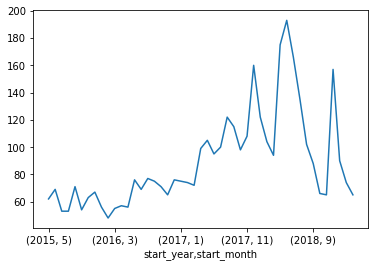

In [26]:
# 코드를 입력해 주세요
# 해당 결과를 시각화 하세요
user.groupby(['start_year', 'start_month'])['userid'].count().plot()
plt.show()

In [27]:
# 코드를 입력해 주세요
# end_year와 end_month 컬럼을 이용하여 월별 탈퇴 회원의 수를 조회하세요
user.groupby(['end_year', 'end_month'])['userid'].count()

end_year  end_month
2018.0    4.0          121
          5.0          125
          6.0          106
          7.0          102
          8.0          113
          9.0          104
          10.0          90
          11.0          89
          12.0         111
2019.0    1.0          129
          2.0          149
          3.0          111
Name: userid, dtype: int64

<AxesSubplot:xlabel='end_year,end_month'>

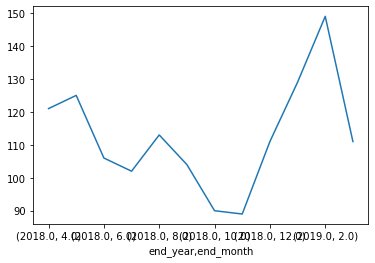

In [28]:
# 코드를 입력해 주세요
# 해당 결과를 시각화 하세요
user.groupby(['end_year', 'end_month'])['userid'].count().plot()

In [29]:
# 코드를 입력해 주세요
# 신규 가입이 가장 많은 상위 5개의 달을 조회하세요.
user.groupby(['start_year', 'start_month'])['userid'].count().sort_values(ascending=False).head()

start_year  start_month
2018        5              193
            4              175
            6              166
2017        12             160
2018        12             157
Name: userid, dtype: int64

In [30]:
# 코드를 입력해 주세요
# 2018년 4~6월 데이터만 추출하세요. 결과를 top3 변수에 저장하세요.
top3 = user.loc[ (user['start_year'] == 2018) & (user['start_month'].isin([4,5,6])), : ]
top3

userid class gender start_date   end_date event_type  is_deleted  \
3204  HD805503   C01      M 2018-05-01        NaT        CA2          -1   
3205  IK000432   C01      F 2018-05-01 2019-03-31        CA2           1   
3206  AS247467   C01      M 2018-05-01 2018-11-30        CA2          -1   
3207  OA777947   C01      M 2018-05-01 2018-12-31        CA2          -1   
3208  HI630247   C01      M 2018-05-01        NaT        CA2           0   
...        ...   ...    ...        ...        ...        ...         ...   
4153  PL850297   C02      F 2018-04-15 2018-05-31        CA3           1   
4154  HD104614   C02      F 2018-04-15 2019-02-28        CA3           1   
4155  AS628722   C02      F 2018-04-15 2019-02-28        CA3           1   
4156  GD716223   C02      F 2018-04-15        NaT        CA3           0   
4157  HD981197   C02      F 2018-04-15 2018-12-31        CA3           1   

     class_name  price event_name  start_year  start_month  start_day  \
3204        all  10000       Sale        2018            5          1   
3205        all  10000       Sale        2018            5          1   
3206        all  10000       Sale        2018            5          1   
3207        all  10000       Sale        2018            5          1   
3208        all  10000       Sale        2018            5          1   
...         ...    ...        ...         ...          ...        ...   
4153        day   7000       Free        2018            4         15   
4154        day   7000       Free        2018            4         15   
4155        day   7000       Free        2018            4         15   
4156        day   7000       Free        2018            4         15   
4157        day   7000       Free        2018            4         15   

      end_year  end_month  end_day  
3204       NaN        NaN      NaN  
3205    2019.0        3.0     31.0  
3206    2018.0       11.0     30.0  
3207    2018.0       12.0     31.0  
3208       NaN        NaN      NaN  
...        ...        ...      ...  
4153    2018.0        5.0     31.0  
4154    2019.0        2.0     28.0  
4155    2019.0        2.0     28.0  
4156       NaN        NaN      NaN  
4157    2018.0       12.0     31.0  

[534 rows x 16 columns]

In [31]:
# 코드를 입력해 주세요
# top3 데이터 프레임의 event_name 컬럼의 고유값별 개수를 조회하세요
top3['event_name'].value_counts()

Sale    359
Free    175
Name: event_name, dtype: int64

In [32]:
# 코드를 입력해 주세요
# top3 데이터 프레임의 class_name 컬럼의 고유값별 개수를 조회하세요
top3['class_name'].value_counts()

all      272
night    140
day      122
Name: class_name, dtype: int64

In [33]:
# 코드를 입력해 주세요
# df_logs의 date 컬럼을 datetime 형식으로 변경하세요.
df_logs['date'] = pd.to_datetime(df_logs['date'])
df_logs

log    userid       date
0       L00000049012330  AS009373 2018-04-01
1       L00000049012331  AS015315 2018-04-01
2       L00000049012332  AS040841 2018-04-01
3       L00000049012333  AS046594 2018-04-01
4       L00000049012334  AS073285 2018-04-01
...                 ...       ...        ...
197423  L00000049209753  TS977703 2019-03-31
197424  L00000049209754  TS979550 2019-03-31
197425  L00000049209755  TS995299 2019-03-31
197426  L00000049209756  TS995853 2019-03-31
197427  L00000049209757  TS999079 2019-03-31

[197428 rows x 3 columns]

In [34]:
# df_logs의 date 컬럼을 년월 형태로 표현하세요.
# dt와 strftime 함수 이용
df_logs['month'] = df_logs['date'].dt.strftime('%Y%m')
df_logs

log    userid       date   month
0       L00000049012330  AS009373 2018-04-01  201804
1       L00000049012331  AS015315 2018-04-01  201804
2       L00000049012332  AS040841 2018-04-01  201804
3       L00000049012333  AS046594 2018-04-01  201804
4       L00000049012334  AS073285 2018-04-01  201804
...                 ...       ...        ...     ...
197423  L00000049209753  TS977703 2019-03-31  201903
197424  L00000049209754  TS979550 2019-03-31  201903
197425  L00000049209755  TS995299 2019-03-31  201903
197426  L00000049209756  TS995853 2019-03-31  201903
197427  L00000049209757  TS999079 2019-03-31  201903

[197428 rows x 4 columns]

In [35]:
# 코드를 입력해 주세요
# df_logs에서 date와 userid를 기준으로 그룹을 생성 후 log의 개수를 카운트하세요.
df_logs_month = df_logs.groupby(['month','userid'])['log'].count()
df_logs_month

month   userid  
201804  AS002855    4
        AS009013    2
        AS009373    3
        AS015315    6
        AS015739    7
                   ..
201903  TS995853    8
        TS998593    8
        TS999079    3
        TS999231    6
        TS999855    4
Name: log, Length: 36842, dtype: int64

In [36]:
# 코드를 입력해 주세요
# df_logs_month 데이터 프레임의 인덱스를 초기화 하세요.
df_logs_month = df_logs_month.reset_index()
df_logs_month

month    userid  log
0      201804  AS002855    4
1      201804  AS009013    2
2      201804  AS009373    3
3      201804  AS015315    6
4      201804  AS015739    7
...       ...       ...  ...
36837  201903  TS995853    8
36838  201903  TS998593    8
36839  201903  TS999079    3
36840  201903  TS999231    6
36841  201903  TS999855    4

[36842 rows x 3 columns]

In [37]:
# 코드를 입력해 주세요
# df_logs_month 데이터 프레임의 log 컬럼의 이름을 freq로 변경하세요
df_logs_month.rename(columns={'log':'freq'}, inplace=True)
df_logs_month

month    userid  freq
0      201804  AS002855     4
1      201804  AS009013     2
2      201804  AS009373     3
3      201804  AS015315     6
4      201804  AS015739     7
...       ...       ...   ...
36837  201903  TS995853     8
36838  201903  TS998593     8
36839  201903  TS999079     3
36840  201903  TS999231     6
36841  201903  TS999855     4

[36842 rows x 3 columns]

In [38]:
# 코드를 입력해 주세요
# df_logs_month 데이터 프레임의 userid를 이용하여 freq 컬럼의 최소, 중앙값, 평균, 최대, 합계를 계산하세요.
user_log = df_logs_month.groupby('userid')['freq'].agg(['min', 'median', 'mean', 'max', 'sum'])
user_log

min  median      mean  max  sum
userid                                   
AS002855    2     5.0  4.500000    7   54
AS008805    1     4.0  4.000000    8   40
AS009013    2     2.0  2.000000    2    2
AS009373    3     5.0  5.083333    7   61
AS015233    4     7.0  7.545455   11   83
...       ...     ...       ...  ...  ...
TS995853    8     9.5  9.500000   11   19
TS998593    7     8.0  8.142857    9   57
TS999079    2     5.5  4.916667    9   59
TS999231    1     5.0  4.666667    8   56
TS999855    3     4.0  4.583333    7   55

[4192 rows x 5 columns]

In [39]:
# 코드를 입력해 주세요
# user_log 데이터 프레임의 인덱스를 초기화 하세요.
user_log.reset_index(inplace=True)
user_log

userid  min  median      mean  max  sum
0     AS002855    2     5.0  4.500000    7   54
1     AS008805    1     4.0  4.000000    8   40
2     AS009013    2     2.0  2.000000    2    2
3     AS009373    3     5.0  5.083333    7   61
4     AS015233    4     7.0  7.545455   11   83
...        ...  ...     ...       ...  ...  ...
4187  TS995853    8     9.5  9.500000   11   19
4188  TS998593    7     8.0  8.142857    9   57
4189  TS999079    2     5.5  4.916667    9   59
4190  TS999231    1     5.0  4.666667    8   56
4191  TS999855    3     4.0  4.583333    7   55

[4192 rows x 6 columns]

In [40]:
# 코드를 입력해 주세요
# df_logs 데이터 프레임을 이용하여 요일(weekday) 정보를 추출하세요
df_logs["wday"] = df_logs["date"].dt.weekday
df_logs

log    userid       date   month  wday
0       L00000049012330  AS009373 2018-04-01  201804     6
1       L00000049012331  AS015315 2018-04-01  201804     6
2       L00000049012332  AS040841 2018-04-01  201804     6
3       L00000049012333  AS046594 2018-04-01  201804     6
4       L00000049012334  AS073285 2018-04-01  201804     6
...                 ...       ...        ...     ...   ...
197423  L00000049209753  TS977703 2019-03-31  201903     6
197424  L00000049209754  TS979550 2019-03-31  201903     6
197425  L00000049209755  TS995299 2019-03-31  201903     6
197426  L00000049209756  TS995853 2019-03-31  201903     6
197427  L00000049209757  TS999079 2019-03-31  201903     6

[197428 rows x 5 columns]

In [41]:
# 코드를 입력해 주세요
# df_logs 데이터 프레임의 userid, month, wday 컬럼을 그룹으로 log 컬럼의 개수를 카운트하세요.
df_logs_weekly = df_logs.groupby(['userid','month','wday'])['log'].agg(['count'])
df_logs_weekly

count
userid   month  wday       
AS002855 201804 5         4
         201805 2         1
                5         4
         201806 5         5
         201807 1         1
...                     ...
TS999855 201901 1         1
                5         4
                6         1
         201902 5         4
         201903 5         4

[93333 rows x 1 columns]

In [42]:
# 코드를 입력해 주세요
# df_logs_weekly의 인덱스를 초기화 하세요.
df_logs_weekly.reset_index(inplace=True)
df_logs_weekly

userid   month  wday  count
0      AS002855  201804     5      4
1      AS002855  201805     2      1
2      AS002855  201805     5      4
3      AS002855  201806     5      5
4      AS002855  201807     1      1
...         ...     ...   ...    ...
93328  TS999855  201901     1      1
93329  TS999855  201901     5      4
93330  TS999855  201901     6      1
93331  TS999855  201902     5      4
93332  TS999855  201903     5      4

[93333 rows x 4 columns]

In [43]:
# 코드를 입력해 주세요
# 매주 방문하는 사람을 찾기 위해 df_logs_weekly 데이터 프레임의 userid 컬럼을 그룹으로 최대값을 계산하세요
df_logs_weekly_routine = df_logs_weekly.groupby('userid').max()
df_logs_weekly_routine

month  wday  count
userid                       
AS002855  201903     6      5
AS008805  201903     6      4
AS009013  201804     0      2
AS009373  201903     6      5
AS015233  201903     6      5
...          ...   ...    ...
TS995853  201903     6      5
TS998593  201903     6      5
TS999079  201903     6      5
TS999231  201903     6      5
TS999855  201903     6      5

[4192 rows x 3 columns]

In [44]:
# 코드를 입력해 주세요
# df_logs_weekly_routine 데이터 프레임에 0의 값을 가지는 routine 컬럼을 추가하세요.
df_logs_weekly_routine['routine'] = 0
df_logs_weekly_routine

month  wday  count  routine
userid                                
AS002855  201903     6      5        0
AS008805  201903     6      4        0
AS009013  201804     0      2        0
AS009373  201903     6      5        0
AS015233  201903     6      5        0
...          ...   ...    ...      ...
TS995853  201903     6      5        0
TS998593  201903     6      5        0
TS999079  201903     6      5        0
TS999231  201903     6      5        0
TS999855  201903     6      5        0

[4192 rows x 4 columns]

In [45]:
# 코드를 입력해 주세요
# count 컬럼의 값이 4 이상인 경우 routine 컬럼의 값을 1로 변경하세요
df_logs_weekly_routine.loc[df_logs_weekly_routine['count'] >= 4, 'routine'] = 1
df_logs_weekly_routine

month  wday  count  routine
userid                                
AS002855  201903     6      5        1
AS008805  201903     6      4        1
AS009013  201804     0      2        0
AS009373  201903     6      5        1
AS015233  201903     6      5        1
...          ...   ...    ...      ...
TS995853  201903     6      5        1
TS998593  201903     6      5        1
TS999079  201903     6      5        1
TS999231  201903     6      5        1
TS999855  201903     6      5        1

[4192 rows x 4 columns]

In [46]:
# 코드를 입력해 주세요
# df_logs_weekly_routine 컬럼의 인덱스를 초기화하고 userid컬럼과 routine 컬럼만 추출하세요.
routine = df_logs_weekly_routine.reset_index()[['userid', 'routine']]
routine

userid  routine
0     AS002855        1
1     AS008805        1
2     AS009013        0
3     AS009373        1
4     AS015233        1
...        ...      ...
4187  TS995853        1
4188  TS998593        1
4189  TS999079        1
4190  TS999231        1
4191  TS999855        1

[4192 rows x 2 columns]

In [47]:
# 코드를 입력해 주세요
# user 데이터 프레임과 user_log 데이터 프레임을 userid를 기준으로 병합하세요
user = pd.merge(user, user_log, on='userid')
user

userid class gender start_date   end_date event_type  is_deleted  \
0     OA832399   C01      F 2015-05-01        NaT        CA1           0   
1     PL270116   C01      M 2015-05-01        NaT        CA1           0   
2     OA974876   C01      M 2015-05-01        NaT        CA1           0   
3     HD024127   C01      F 2015-05-01        NaT        CA1          -1   
4     IK271057   C01      M 2015-05-01        NaT        CA1           0   
...        ...   ...    ...        ...        ...        ...         ...   
4187  IK562610   C02      F 2018-12-13 2019-02-28        CA3           1   
4188  HI599354   C02      M 2018-12-13        NaT        CA3           0   
4189  GD796859   C02      F 2018-12-14        NaT        CA3           0   
4190  GD082270   C02      F 2018-12-14 2019-02-28        CA3           1   
4191  OA426023   C02      F 2018-12-14        NaT        CA3           0   

     class_name  price event_name  ...  start_month  start_day  end_year  \
0           all  10000       None  ...            5          1       NaN   
1           all  10000       None  ...            5          1       NaN   
2           all  10000       None  ...            5          1       NaN   
3           all  10000       None  ...            5          1       NaN   
4           all  10000       None  ...            5          1       NaN   
...         ...    ...        ...  ...          ...        ...       ...   
4187        day   7000       Free  ...           12         13    2019.0   
4188        day   7000       Free  ...           12         13       NaN   
4189        day   7000       Free  ...           12         14       NaN   
4190        day   7000       Free  ...           12         14    2019.0   
4191        day   7000       Free  ...           12         14       NaN   

      end_month  end_day  min  median      mean  max  sum  
0           NaN      NaN    2     5.0  4.833333    8   58  
1           NaN      NaN    3     5.0  5.083333    7   61  
2           NaN      NaN    3     5.0  4.583333    6   55  
3           NaN      NaN    2     4.5  4.833333    7   58  
4           NaN      NaN    2     3.5  3.750000    5   45  
...         ...      ...  ...     ...       ...  ...  ...  
4187        2.0     28.0    3     4.0  5.666667   10   17  
4188        NaN      NaN    5     7.5  7.500000   10   30  
4189        NaN      NaN    6     7.5  7.250000    8   29  
4190        2.0     28.0    3     5.0  6.000000   10   18  
4191        NaN      NaN    8     9.0  9.500000   12   38  

[4192 rows x 21 columns]

In [48]:
# 코드를 입력해 주세요
# user 데이터 프레임과 routine 데이터 프레임을 userid를 기준으로 병합하세요
user = pd.merge(user, routine, on='userid')
user

userid class gender start_date   end_date event_type  is_deleted  \
0     OA832399   C01      F 2015-05-01        NaT        CA1           0   
1     PL270116   C01      M 2015-05-01        NaT        CA1           0   
2     OA974876   C01      M 2015-05-01        NaT        CA1           0   
3     HD024127   C01      F 2015-05-01        NaT        CA1          -1   
4     IK271057   C01      M 2015-05-01        NaT        CA1           0   
...        ...   ...    ...        ...        ...        ...         ...   
4187  IK562610   C02      F 2018-12-13 2019-02-28        CA3           1   
4188  HI599354   C02      M 2018-12-13        NaT        CA3           0   
4189  GD796859   C02      F 2018-12-14        NaT        CA3           0   
4190  GD082270   C02      F 2018-12-14 2019-02-28        CA3           1   
4191  OA426023   C02      F 2018-12-14        NaT        CA3           0   

     class_name  price event_name  ...  start_day  end_year  end_month  \
0           all  10000       None  ...          1       NaN        NaN   
1           all  10000       None  ...          1       NaN        NaN   
2           all  10000       None  ...          1       NaN        NaN   
3           all  10000       None  ...          1       NaN        NaN   
4           all  10000       None  ...          1       NaN        NaN   
...         ...    ...        ...  ...        ...       ...        ...   
4187        day   7000       Free  ...         13    2019.0        2.0   
4188        day   7000       Free  ...         13       NaN        NaN   
4189        day   7000       Free  ...         14       NaN        NaN   
4190        day   7000       Free  ...         14    2019.0        2.0   
4191        day   7000       Free  ...         14       NaN        NaN   

      end_day  min  median      mean  max  sum  routine  
0         NaN    2     5.0  4.833333    8   58        1  
1         NaN    3     5.0  5.083333    7   61        1  
2         NaN    3     5.0  4.583333    6   55        1  
3         NaN    2     4.5  4.833333    7   58        1  
4         NaN    2     3.5  3.750000    5   45        1  
...       ...  ...     ...       ...  ...  ...      ...  
4187     28.0    3     4.0  5.666667   10   17        0  
4188      NaN    5     7.5  7.500000   10   30        1  
4189      NaN    6     7.5  7.250000    8   29        1  
4190     28.0    3     5.0  6.000000   10   18        0  
4191      NaN    8     9.0  9.500000   12   38        1  

[4192 rows x 22 columns]

In [49]:
# 코드를 입력해 주세요
# end_date 컬럼와 start_date 컬럼의 차이를 이용하여 회원 기간을 계산하세요
user['period'] = user['end_date'] - user['start_date']
user

userid class gender start_date   end_date event_type  is_deleted  \
0     OA832399   C01      F 2015-05-01        NaT        CA1           0   
1     PL270116   C01      M 2015-05-01        NaT        CA1           0   
2     OA974876   C01      M 2015-05-01        NaT        CA1           0   
3     HD024127   C01      F 2015-05-01        NaT        CA1          -1   
4     IK271057   C01      M 2015-05-01        NaT        CA1           0   
...        ...   ...    ...        ...        ...        ...         ...   
4187  IK562610   C02      F 2018-12-13 2019-02-28        CA3           1   
4188  HI599354   C02      M 2018-12-13        NaT        CA3           0   
4189  GD796859   C02      F 2018-12-14        NaT        CA3           0   
4190  GD082270   C02      F 2018-12-14 2019-02-28        CA3           1   
4191  OA426023   C02      F 2018-12-14        NaT        CA3           0   

     class_name  price event_name  ...  end_year  end_month  end_day  min  \
0           all  10000       None  ...       NaN        NaN      NaN    2   
1           all  10000       None  ...       NaN        NaN      NaN    3   
2           all  10000       None  ...       NaN        NaN      NaN    3   
3           all  10000       None  ...       NaN        NaN      NaN    2   
4           all  10000       None  ...       NaN        NaN      NaN    2   
...         ...    ...        ...  ...       ...        ...      ...  ...   
4187        day   7000       Free  ...    2019.0        2.0     28.0    3   
4188        day   7000       Free  ...       NaN        NaN      NaN    5   
4189        day   7000       Free  ...       NaN        NaN      NaN    6   
4190        day   7000       Free  ...    2019.0        2.0     28.0    3   
4191        day   7000       Free  ...       NaN        NaN      NaN    8   

      median      mean  max  sum  routine  period  
0        5.0  4.833333    8   58        1     NaT  
1        5.0  5.083333    7   61        1     NaT  
2        5.0  4.583333    6   55        1     NaT  
3        4.5  4.833333    7   58        1     NaT  
4        3.5  3.750000    5   45        1     NaT  
...      ...       ...  ...  ...      ...     ...  
4187     4.0  5.666667   10   17        0 77 days  
4188     7.5  7.500000   10   30        1     NaT  
4189     7.5  7.250000    8   29        1     NaT  
4190     5.0  6.000000   10   18        0 76 days  
4191     9.0  9.500000   12   38        1     NaT  

[4192 rows x 23 columns]

In [50]:
# 코드를 입력해 주세요
# period 컬럼이 NaT인 경우 아직 탈퇴하지않은 회원으로 2019년04월30일을 기준으로 차이를 계산합니다.
user.loc[user['period'].isna(), 'period'] = pd.to_datetime("20190430") - user['start_date']
user

userid class gender start_date   end_date event_type  is_deleted  \
0     OA832399   C01      F 2015-05-01        NaT        CA1           0   
1     PL270116   C01      M 2015-05-01        NaT        CA1           0   
2     OA974876   C01      M 2015-05-01        NaT        CA1           0   
3     HD024127   C01      F 2015-05-01        NaT        CA1          -1   
4     IK271057   C01      M 2015-05-01        NaT        CA1           0   
...        ...   ...    ...        ...        ...        ...         ...   
4187  IK562610   C02      F 2018-12-13 2019-02-28        CA3           1   
4188  HI599354   C02      M 2018-12-13        NaT        CA3           0   
4189  GD796859   C02      F 2018-12-14        NaT        CA3           0   
4190  GD082270   C02      F 2018-12-14 2019-02-28        CA3           1   
4191  OA426023   C02      F 2018-12-14        NaT        CA3           0   

     class_name  price event_name  ...  end_year  end_month  end_day  min  \
0           all  10000       None  ...       NaN        NaN      NaN    2   
1           all  10000       None  ...       NaN        NaN      NaN    3   
2           all  10000       None  ...       NaN        NaN      NaN    3   
3           all  10000       None  ...       NaN        NaN      NaN    2   
4           all  10000       None  ...       NaN        NaN      NaN    2   
...         ...    ...        ...  ...       ...        ...      ...  ...   
4187        day   7000       Free  ...    2019.0        2.0     28.0    3   
4188        day   7000       Free  ...       NaN        NaN      NaN    5   
4189        day   7000       Free  ...       NaN        NaN      NaN    6   
4190        day   7000       Free  ...    2019.0        2.0     28.0    3   
4191        day   7000       Free  ...       NaN        NaN      NaN    8   

      median      mean  max  sum  routine    period  
0        5.0  4.833333    8   58        1 1460 days  
1        5.0  5.083333    7   61        1 1460 days  
2        5.0  4.583333    6   55        1 1460 days  
3        4.5  4.833333    7   58        1 1460 days  
4        3.5  3.750000    5   45        1 1460 days  
...      ...       ...  ...  ...      ...       ...  
4187     4.0  5.666667   10   17        0   77 days  
4188     7.5  7.500000   10   30        1  138 days  
4189     7.5  7.250000    8   29        1  137 days  
4190     5.0  6.000000   10   18        0   76 days  
4191     9.0  9.500000   12   38        1  137 days  

[4192 rows x 23 columns]

In [51]:
# 코드를 입력해 주세요
# user 데이터 프레임의 min, median, mean, max, sum 컬럼의 기술통계요약정보를 출력하세요.
user[['min', 'median', 'mean', 'max', 'sum']].describe()

min       median         mean          max          sum
count  4192.000000  4192.000000  4192.000000  4192.000000  4192.000000
mean      3.041269     5.250596     5.333127     7.823950    47.096374
std       1.951565     1.874874     1.777533     2.168959    24.218124
min       1.000000     1.000000     1.000000     1.000000     1.000000
25%       2.000000     4.000000     4.250000     7.000000    26.000000
50%       3.000000     5.000000     5.000000     8.000000    53.000000
75%       4.000000     6.500000     6.416667     9.000000    65.000000
max      12.000000    12.000000    12.000000    14.000000   105.000000

In [52]:
# 코드를 입력해 주세요
# user 데이터 프레임의 routine 컬럼의 고유값별 개수를 계산하세요
user['routine'].value_counts()

1    3413
0     779
Name: routine, dtype: int64

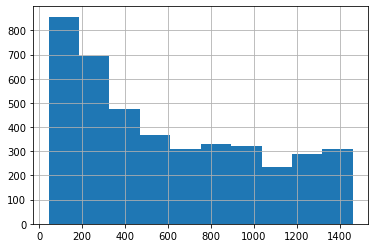

In [53]:
# 코드를 입력해 주세요
# user 데이터 프레임의 period_day 컬럼의 histogram을 그려보세요.
user['period_day'] = user['period'].dt.days
user['period_day'].hist()
plt.show()

# ML (Classification)

In [54]:
# 코드를 입력해 주세요
# user 데이터 프레임을 조회하세요.
user

userid class gender start_date   end_date event_type  is_deleted  \
0     OA832399   C01      F 2015-05-01        NaT        CA1           0   
1     PL270116   C01      M 2015-05-01        NaT        CA1           0   
2     OA974876   C01      M 2015-05-01        NaT        CA1           0   
3     HD024127   C01      F 2015-05-01        NaT        CA1          -1   
4     IK271057   C01      M 2015-05-01        NaT        CA1           0   
...        ...   ...    ...        ...        ...        ...         ...   
4187  IK562610   C02      F 2018-12-13 2019-02-28        CA3           1   
4188  HI599354   C02      M 2018-12-13        NaT        CA3           0   
4189  GD796859   C02      F 2018-12-14        NaT        CA3           0   
4190  GD082270   C02      F 2018-12-14 2019-02-28        CA3           1   
4191  OA426023   C02      F 2018-12-14        NaT        CA3           0   

     class_name  price event_name  ...  end_month  end_day  min  median  \
0           all  10000       None  ...        NaN      NaN    2     5.0   
1           all  10000       None  ...        NaN      NaN    3     5.0   
2           all  10000       None  ...        NaN      NaN    3     5.0   
3           all  10000       None  ...        NaN      NaN    2     4.5   
4           all  10000       None  ...        NaN      NaN    2     3.5   
...         ...    ...        ...  ...        ...      ...  ...     ...   
4187        day   7000       Free  ...        2.0     28.0    3     4.0   
4188        day   7000       Free  ...        NaN      NaN    5     7.5   
4189        day   7000       Free  ...        NaN      NaN    6     7.5   
4190        day   7000       Free  ...        2.0     28.0    3     5.0   
4191        day   7000       Free  ...        NaN      NaN    8     9.0   

          mean  max  sum  routine    period  period_day  
0     4.833333    8   58        1 1460 days        1460  
1     5.083333    7   61        1 1460 days        1460  
2     4.583333    6   55        1 1460 days        1460  
3     4.833333    7   58        1 1460 days        1460  
4     3.750000    5   45        1 1460 days        1460  
...        ...  ...  ...      ...       ...         ...  
4187  5.666667   10   17        0   77 days          77  
4188  7.500000   10   30        1  138 days         138  
4189  7.250000    8   29        1  137 days         137  
4190  6.000000   10   18        0   76 days          76  
4191  9.500000   12   38        1  137 days         137  

[4192 rows x 24 columns]

In [55]:
# 코드를 입력해 주세요
# user 데이터 프레임에서 다음의 결과와 같이 컬럼을 선택 후 df 변수에 저장하세요.
df = user[['gender', 'is_deleted', 'class_name', 'price', 'event_name', 'min', 'max', 'median', 'max', 'sum', 'routine', 'period_day']]
df

gender  is_deleted class_name  price event_name  min  max  median  max  \
0         F           0        all  10000       None    2    8     5.0    8   
1         M           0        all  10000       None    3    7     5.0    7   
2         M           0        all  10000       None    3    6     5.0    6   
3         F          -1        all  10000       None    2    7     4.5    7   
4         M           0        all  10000       None    2    5     3.5    5   
...     ...         ...        ...    ...        ...  ...  ...     ...  ...   
4187      F           1        day   7000       Free    3   10     4.0   10   
4188      M           0        day   7000       Free    5   10     7.5   10   
4189      F           0        day   7000       Free    6    8     7.5    8   
4190      F           1        day   7000       Free    3   10     5.0   10   
4191      F           0        day   7000       Free    8   12     9.0   12   

      sum  routine  period_day  
0      58        1        1460  
1      61        1        1460  
2      55        1        1460  
3      58        1        1460  
4      45        1        1460  
...   ...      ...         ...  
4187   17        0          77  
4188   30        1         138  
4189   29        1         137  
4190   18        0          76  
4191   38        1         137  

[4192 rows x 12 columns]

In [56]:
# 코드를 입력해 주세요
# df에서 is_deleted 컬럼을 Y로 나머지를 X로 설정하세요
X = df.loc[:, df.columns != 'is_deleted']
Y = df['is_deleted']

In [57]:
# 코드를 입력해 주세요
# X를 출력하세요.
X

gender class_name  price event_name  min  max  median  max  sum  routine  \
0         F        all  10000       None    2    8     5.0    8   58        1   
1         M        all  10000       None    3    7     5.0    7   61        1   
2         M        all  10000       None    3    6     5.0    6   55        1   
3         F        all  10000       None    2    7     4.5    7   58        1   
4         M        all  10000       None    2    5     3.5    5   45        1   
...     ...        ...    ...        ...  ...  ...     ...  ...  ...      ...   
4187      F        day   7000       Free    3   10     4.0   10   17        0   
4188      M        day   7000       Free    5   10     7.5   10   30        1   
4189      F        day   7000       Free    6    8     7.5    8   29        1   
4190      F        day   7000       Free    3   10     5.0   10   18        0   
4191      F        day   7000       Free    8   12     9.0   12   38        1   

      period_day  
0           1460  
1           1460  
2           1460  
3           1460  
4           1460  
...          ...  
4187          77  
4188         138  
4189         137  
4190          76  
4191         137  

[4192 rows x 11 columns]

In [58]:
# 코드를 입력해 주세요
# Y를 출력하세요.
Y

0       0
1       0
2       0
3      -1
4       0
       ..
4187    1
4188    0
4189    0
4190    1
4191    0
Name: is_deleted, Length: 4192, dtype: int64

In [59]:
# X를 One Hot 변환하세요
X = pd.get_dummies(X)
X

price  min  max  median  max  sum  routine  period_day  gender_F  \
0     10000    2    8     5.0    8   58        1        1460         1   
1     10000    3    7     5.0    7   61        1        1460         0   
2     10000    3    6     5.0    6   55        1        1460         0   
3     10000    2    7     4.5    7   58        1        1460         1   
4     10000    2    5     3.5    5   45        1        1460         0   
...     ...  ...  ...     ...  ...  ...      ...         ...       ...   
4187   7000    3   10     4.0   10   17        0          77         1   
4188   7000    5   10     7.5   10   30        1         138         0   
4189   7000    6    8     7.5    8   29        1         137         1   
4190   7000    3   10     5.0   10   18        0          76         1   
4191   7000    8   12     9.0   12   38        1         137         1   

      gender_M  class_name_all  class_name_day  class_name_night  \
0            0               1               0                 0   
1            1               1               0                 0   
2            1               1               0                 0   
3            0               1               0                 0   
4            1               1               0                 0   
...        ...             ...             ...               ...   
4187         0               0               1                 0   
4188         1               0               1                 0   
4189         0               0               1                 0   
4190         0               0               1                 0   
4191         0               0               1                 0   

      event_name_Free  event_name_None  event_name_Sale  
0                   0                1                0  
1                   0                1                0  
2                   0                1                0  
3                   0                1                0  
4                   0                1                0  
...               ...              ...              ...  
4187                1                0                0  
4188                1                0                0  
4189                1                0                0  
4190                1                0                0  
4191                1                0                0  

[4192 rows x 16 columns]

In [60]:
# 코드를 입력해 주세요
# X와 Y를 Train 과 Test로 분할하세요.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=0)

In [61]:
# 코드를 입력해 주세요
# KNN 알고리즘을 이용하여 분류하세요.
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.8110687022900763, 0.6688931297709924)

In [62]:
# 코드를 입력해 주세요
# LogisticRegression 알고리즘을 이용하여 분류하세요.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.7232824427480916, 0.7146946564885496)

In [63]:
# 코드를 입력해 주세요
# DecisionTree 알고리즘을 이용하여 분류하세요.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.7487277353689568, 0.7309160305343512)

In [64]:
# 코드를 입력해 주세요
# feature_importances_를 Series로 변환하세요.
fi = pd.Series(model.feature_importances_, index=X.columns)
fi

price               0.004176
min                 0.021206
max                 0.005352
median              0.341665
max                 0.009488
sum                 0.548655
routine             0.000000
period_day          0.067465
gender_F            0.000000
gender_M            0.000000
class_name_all      0.000000
class_name_day      0.000000
class_name_night    0.000000
event_name_Free     0.000000
event_name_None     0.000000
event_name_Sale     0.001994
dtype: float64

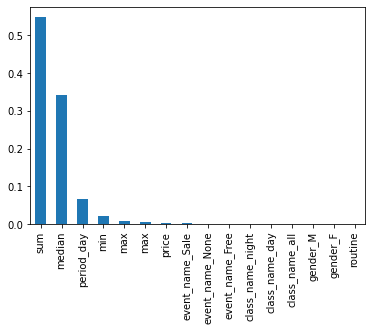

In [66]:
# 코드를 입력해 주세요
# 변환된 결과를 시각화 하세요.
fi.sort_values(ascending=False).plot(kind='bar')
plt.show()